In [1]:
import os
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import pandas as pd

In [2]:
from Crypto.PublicKey import RSA
path_store_key = 'keys/'
path_private_key = os.path.join(path_store_key, "private.pem")
path_public_key = os.path.join(path_store_key, "receiver.pem")
secret_code = "Unguessable"

**Chiffrer un message avec l'algorithme RSA et un code secret**

* Créer une clé publique pour chiffrer le message
* Créer une clé privée avec un code secret

Le destinaire recevra la clé privée pour déchiffrer le message. Celle-ci est accompagnée du code sécret pour la lecture.

In [3]:
# Generate key
key = RSA.generate(2048)

# Store key of decryption
secret_code = "Unguessable"
key = RSA.generate(2048)
private_key = key.exportKey(passphrase=secret_code)
file_out = open(path_private_key, "wb")
file_out.write(private_key)
file_out.close()

# Store key of encryption
public_key = key.publickey().exportKey()
file_out = open(path_public_key, "wb")
file_out.write(public_key)
file_out.close()

**Chiffrer un message**

In [4]:
message = "Ceci est un secret"
recipient_key = RSA.importKey(open(path_public_key).read()) 
cipher_rsa = PKCS1_OAEP.new(recipient_key)
encrypted = cipher_rsa.encrypt(message.encode("utf-8"))
encrypted

b'+\x152\xab3Y\xf6\xe0\x13\xbcWqN9\x01^&M\x01"S\x13\xf9E\n\x14\xd9\x93\xb4q\x0fC\xde(\x01\xeb\xfeC\x11\xfb\xe7\x8a\xc9dj?\x95\t\xc8`\xb1c\xaa\xc5 \n|x\r\xa7p\xb1\xb2\x80\xdc\t\xe3\xdc\xac\xf0\xaa\xcb\xa3\xf6r]i:\x9b\xd1\xdf^\x8e\xf7\xd6L\x1c/\xc0M#\xfe\x1e\xb3b4POh|\xab\xb5\x8a\xbe"y\x1bE\xdfT\xdf:\xe5!\x10\x07\x8cq]\x15F\xa0\x87D\xf1\x1d\x85\xd1w\xfe\xe0_\x18\x94\xd8\xaeo\x83\xc3B\x06 \x90u\x07[\x9dz\xa9a\x13@5\x89\xa0J)xN\xb1\xd0\x8c!\x06+@\xc3\xf0\x86\xdaR\x86 \x1b\xeb\xe6\x7f\x96;\xd9\xf3\x9b\xc5\xe0p\x14=\xc2\xc1D7\x91\xab\xf2\xef\xcb\xdaP\xce\x01\x7f\x81\x94\xb6\x12\x87\xb0\x01x\x9a\xcd]0#\xc3\xd8\x88A\xe6\x90\xcd\x01\xc6sU#\xe3\xfa\xf2h}\x1d\xc0\xbd\x1a\xb0\x0f\x81\xf0\xa8\xc0\x0c\x84\xb8\x96\xff\xa7\xe0\xd1\x805\xb6\tj\xd4\x86'

**Déchiffer le message**

In [5]:
private_key = RSA.importKey(open(path_private_key).read(), passphrase=secret_code) 
cipher_rsa = PKCS1_OAEP.new(private_key)
cipher_rsa.decrypt(encrypted).decode('utf-8')

'Ceci est un secret'

In [6]:
message.encode("utf-8")

b'Ceci est un secret'

**Chiffrer une image**

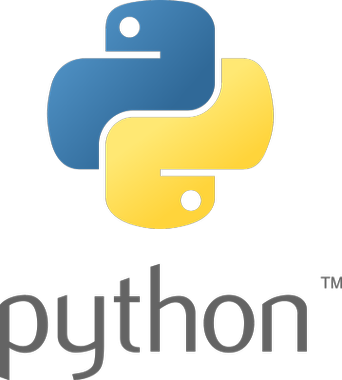

In [7]:
from PIL import Image
import io
from IPython.display import display

image = Image.open("python-logo.png")
image_data = image.tobytes()
image_size = image.size
display(image)

In [8]:
image_data[:100]

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [9]:
recipient_key = RSA.importKey(open(path_public_key).read()) 
cipher_rsa = PKCS1_OAEP.new(recipient_key)

In [10]:
string_len = 128
encrypted = b'' 
finished = False
while not finished:
    string_b = image_data[:string_len]
    image_data = image_data[string_len:]
    if len(string_b) == 0 or len(string_b) % string_len != 0:
        padding_length = (string_len - len(string_b) % string_len)
        string_b += padding_length * str.encode(chr(padding_length))
        finished = True
    encrypted += cipher_rsa.encrypt(string_b)

In [11]:
encrypted[:100]

b'I\xab\x9dV\x11\xc5Ts\xf3\x85\xdf\x9d<@p\xe4\x0cA\x1c\xcb\x7f\x8d\x83\x85\x10\xfdjG\xf0\xdb\x02\xb9\xc7\xe3$\xa6#fE\x1el\xd5a\xf7H\xf6\xf8y\xb3\xfc\x06\x7f4\xc4\x9e\x11yZ\xe3\xfa.\x8c\x0b\x97|\x80r\x9e\xfa\xaa\x18\xd0\x17\xa5\xb7,\x15\x8a\x99\xf8@\x8d\x11 \x83\x19t\x84!/\x9a\r%,\xc7\xd7\xfcr\xec\xd3'

**Déchiffrer l'image cryptée**

In [12]:
private_key = RSA.importKey(open(path_private_key).read(), passphrase=secret_code) 
cipher_rsa = PKCS1_OAEP.new(private_key)

In [13]:
size = private_key.size_in_bytes()
splitted_enc = [encrypted[i: i + size] for i in range(0, len(encrypted), size)]
image_data = b'' 
for data in splitted_enc:
    image_data += cipher_rsa.decrypt(data)

In [14]:
image_data[:100]

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

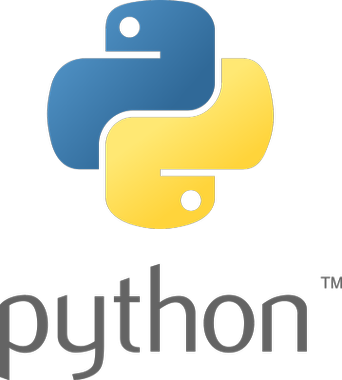

In [15]:
image_decrypted = Image.frombytes("RGBA", image_size, image_data)
display(image_decrypted)

**Chiffrer un dataframe ligne par ligne**

In [16]:
data = {
    'ID' : ['001', '002', '003', '004'],
    'DEPARTEMENT' : ["Marketing", "Marketing", "Informatique", "Ventes"],
    'NOM' : ['Arthur Rimbeaud', 'Aurore Dupond', 'Victor Hugo', 'Marcel Pagnol'],
    'AGE' : [27, 35, 30, 25],
    'SALAIRE': [3000, 5000, 4000, 2500]
}

dtype = {
    'ID' : str,
    'DEPARTEMENT' : str,
    'NOM' : str,
    'AGE' : int,
    'SALAIRE': int
}

data = pd.DataFrame(data)
data

,ID,DEPARTEMENT,NOM,AGE,SALAIRE
0,001,Marketing,Arthur Rimbeaud,27,3000
1,002,Marketing,Aurore Dupond,35,5000
2,003,Informatique,Victor Hugo,30,4000
3,004,Ventes,Marcel Pagnol,25,2500


In [17]:
from io import StringIO
from IPython.display import display

# Keys pour chiffrer et déchiffrer
path_store_key = 'keys/'
path_private_key = os.path.join(path_store_key, "private.pem")
path_public_key = os.path.join(path_store_key, "receiver.pem")

In [18]:
# Préparation de la dataframe pour le chiffrement

In [19]:
cols = data.columns.tolist()
colname = ';'.join(data.columns)
data[colname] = data.apply(lambda row: ';'.join([str(rw) for rw in row]).encode('utf-8'), axis=1)
data = data.drop(cols, axis=1)

In [20]:
# Chiffrement de la dataframe

In [21]:
recipient_key = RSA.importKey(open(path_public_key).read()) 
cipher_rsa = PKCS1_OAEP.new(recipient_key)
data[colname] = data[colname].map(lambda m: cipher_rsa.encrypt(m))
data

,ID;DEPARTEMENT;NOM;AGE;SALAIRE
0,"b""%aC\xd8\xa9\x8a\x13\x0e-g\xd4{0\xe5\xd6\xf4\..."
1,b'?(4\xb6\xd6R\x80x\x89\x1e\xb4]\xfcCY\xe0Bkr\...
2,b'W\xeb\xc17\xa4\xa4\x9c\xdf3Y\xb5\xe5\x14\r\x...
3,b'9\x1a\x0e\xe9\xd3F\xf9\x04\xdc\x83:\xbd\x89W...


In [22]:
# Déchiffrement de la datafram
private_key = RSA.importKey(open(path_private_key).read(), passphrase=secret_code) 
cipher_rsa = PKCS1_OAEP.new(private_key)
data[colname] = data[colname].map(lambda m: cipher_rsa.decrypt(m).decode('utf-8'))

# Split colonne
data = pd.read_csv(StringIO(data.to_string(index=False)), sep=';', dtype=dtype)
data

,ID,DEPARTEMENT,NOM,AGE,SALAIRE
0,1,Marketing,Arthur Rimbeaud,27,3000
1,2,Marketing,Aurore Dupond,35,5000
2,3,Informatique,Victor Hugo,30,4000
3,4,Ventes,Marcel Pagnol,25,2500
